### Type of clustering

#### Based On How We Group

1. Hard Clustering - In hard clustering, each data point either belongs to a cluster completely or not.

2. Soft Clustering - In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned.

### Clustering Algorithms

Every methodology follows a different set of rules for defining the ‘similarity’ among data points.Every methodology follows a different set of rules for defining the ‘similarity’ among data points.

#### 1. Connectivity Models
**Key Idea**: The data points closer in data space exhibit more similarity to each other than the data points lying farther away

##### Approaches
1. Start with classifying all data points into separate clusters & then aggregating them as the distance decreases.
2. All data points are classified as a single cluster and then partitioned as the distance increases.

###### Drawbacks
* Simple to understand but lacks scalability.


#### 2. Centroid Models
**Key Idea***: The notion of similarity is derived by the closeness of a data point to the centroid of the clusters. It is iterative by nature therefore addresses the problem of scalability.

###### Drawbacks
* The number of cluster must be known beforehand therefore knowledge of the data at hand is expected reasonably.


#### 3. Distribution Models
**Key Idea**: Based on the notion of how probable is it that all data points in the cluster belong to the same distribution (e.g. normal distribution, or gaussian dist).

###### Drawbacks
* Suffers from overfitting.

#### 4. Density Models
**Key Idea**: Searches the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster.




### K- Means Clustering
* Iterative Clustering. Following are the steps involved in the clustering using the k-means.
* It is a hard clustering, i.e one data-point is the member of one and only one cluster. That is there is no way of quantifying the relationship of one data-point to multiple clusters.


#### Inertia of dataset:
The amount of inertia in a data set is a multivariate measure of the amount of variation in a data set.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion.

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

* Inertia makes the assumption that clusters are `convex and isotropic`, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

* Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

** A convex shape is the opposite of a concave shape. It curves outward, and its middle is thicker than its edges.

** isotorpic is having a physical property which has the same value when measured in different directions.



In [1]:
import numpy as np
import math
x = np.random.randint(1,30,size=10)
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

In [2]:
# considering the numberline case, i.e. single feature
k = 3
def getKSeedArr(K, obArr:list, empArr:list = list()):
# selection of an element at random
    assert K<= len(obArr)
    while K>=1:
        num = obArr[np.random.randint(0,len(obArr))]
        empArr.append([num])
        obArr.remove(num)
        K-=1
    return obArr, empArr    
        
def pushSmallestDistOnce(arr_arr, elem_arr):
    #find centre point if number of elements in seed_arr is > 1
    for elem in elem_arr:
        dist = []
        for arr in arr_arr:
    #        print(arr)
            c_p = sum(arr)/len(arr)
            dist.append(math.sqrt(abs(c_p - elem))) #distance between two points on the numberline
        arr_arr[dist.index(min(dist))].append(elem)
    return arr_arr


def concat_small_to_big(arr_arr,cnt=5):
    start = []
    for i in arr_arr:
        start += i
    return start

def redist(dist_arr,cnts):
    arrx = concat_small_to_big(dist_arr)
    while cnts>=1:
        for elem in arrx:
            dist = []
            delted = False
            for arr in dist_arr:
                c_p = sum(arr)/len(arr)
                dist.append(math.sqrt(abs(c_p - elem))) #distance between two points on the numberline
                if elem in arr and not delted:
#                     print('delted:yes')
                    arr.remove(elem)
                    delted=True
            delted=False
            dist_arr[dist.index(min(dist))].append(elem)
        cnts -= 1
    return dist_arr
            
    
# cnt = 0
# karr = []
# while cnt<= k:
#     karr.append()

obs,seedArr = getKSeedArr(3,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
print(obs,seedArr)
pushSmallestDistOnce(seedArr,obs)
#rint(concat_small_to_big(seedArr))

[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16] [[14], [10], [4]]


[[14, 12, 13, 15, 16], [10, 7, 8, 9, 11], [4, 1, 2, 3, 5, 6]]

In [17]:
df_feat = df.drop(["species"], axis =1)
df_feat

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
feat_arr = np.asarray(df_feat)
mean_arr = np.sum(feat_arr, axis=0)/feat_arr.shape[0]
std_arr = np.std(feat_arr, axis=0)

norm_data = (feat_arr - mean_arr)/std_arr

In [19]:
norm_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [20]:
# std_scale = preprocessing.StandardScaler().fit(feat_arr)
# df_std = std_scale.transform(feat_arr)

In [12]:
%time
kmeans = KMeans(n_clusters=3, random_state=0).fit(norm_data)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 16.2 µs


In [9]:
old_df= df.replace({'species':{'setosa':1,'versicolor':2,'virginica':0}})

old_df['predicted']=kmeans.labels_

wrong = old_df[old_df['predicted']!=old_df['species']]
# it seems that versicolor and virginica look similar
 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

In [6]:
## generating random data and labels
np.random.seed(0)
centers = [[1,1],[-1,-1],[1,-1]]
n_clus = len(centers)
X,labels_true = make_blobs(n_samples=5000, centers=centers, cluster_std=0.7)

In [10]:
#SIMPLE KMEANS CLUSTERING
k_means = KMeans(init='k-means++', n_clusters=n_clus, n_init=10)
k_means.fit(X)

#X['equal']= labels_true


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
k_means.labels_
df = pd.DataFrame(X)
df['pred'] = k_means.labels_
df['actual'] = labels_true
df['pred'].unique()
df['actual'].unique()

array([1, 2, 0])

In [18]:

#how well does it work:

pc1 = df[df['pred']==1].index
pc2 = df[df['pred']==2].index
pc3 = df[df['pred']==0].index

ac1 = df[df['actual']==1].index
ac2 = df[df['actual']==2].index
ac3 = df[df['actual']==0].index


In [19]:
miss1 = np.setdiff1d(np.union1d(pc1,ac1),ac1)
miss2 = np.setdiff1d(np.union1d(pc2,ac2),ac2)
miss3 = np.setdiff1d(np.union1d(pc3,ac3),ac3)
print(miss1.shape, miss2.shape, miss3.shape)
improper_classificaton = miss1.shape[0]+miss2.shape[0]+miss3.shape[0]
err = (100*improper_classificaton)/df.shape[0]
print('error classification',err)

(144,) (228,) (132,)
error classification 10.08


### K-means with mini-batching

The algorithm iterates between two major steps:
1. In the first step, samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. 
2. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. 

**For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.**

`MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced.`

In [20]:
print(X.shape,labels_true.shape)
batch_size = 200

(5000, 2) (5000,)


In [25]:
model = MiniBatchKMeans(init="k-means++",batch_size=batch_size,verbose=0,n_clusters=3)
model.fit(X)

MiniBatchKMeans(batch_size=200, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [28]:
dfMini = pd.DataFrame(X)
dfMini['pred'] = model.labels_
dfMini['actual'] = labels_true

#how well does it work:
#The pred, actual values vary in each re-run
#if the result seems wrong it is due to the fact that the data has been classifed in uneven clusters
pc1 = dfMini[dfMini['pred']==1].index
pc2 = dfMini[dfMini['pred']==2].index
pc3 = dfMini[dfMini['pred']==0].index

ac1 = dfMini[dfMini['actual']==1].index
ac2 = dfMini[dfMini['actual']==0].index
ac3 = dfMini[dfMini['actual']==2].index

miss1 = np.setdiff1d(np.union1d(pc1,ac1),ac1)
miss2 = np.setdiff1d(np.union1d(pc2,ac2),ac2)
miss3 = np.setdiff1d(np.union1d(pc3,ac3),ac3)
print(miss1.shape, miss2.shape, miss3.shape)
improper_classificaton = miss1.shape[0]+miss2.shape[0]+miss3.shape[0]
err = (100*improper_classificaton)/df.shape[0]
print('error classification',err)

(157,) (124,) (227,)
error classification 10.16


## Gaussian Distribution
$p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}$

$\sigma$ - standard deviation 

$\sigma^{2} = VAR$  
&nbsp; &nbsp; **OR**     
$\sigma = \sqrt{var}$

It creates a bell shaped curve of the distribution and the area under the curve tells us the probabilty of those values occuring.
It always has to be a range.
So the probability of x:
$$   x\in \left( 3,5 \right) = \int_{a}^{b} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}} dx$$  

Similarly the CDF (commulative density function) is probability upto x:
$$ cdf(x) = \int_{-\infty}^{x} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}$$

Assuming the normal distribution:
probabilty percent for

| no of sds|probabilty percent|
|----------|------------------|
|1|62.27|
|2||
|3|99.73|

## Gaussian Distribution (Multivariate)

$$ \mathcal{N}\left( x; \mu,\sum\right) = \frac{1}{\left(2\pi \right)^{\frac{d}{2}}}\bigg| \sum \bigg|^\frac{-1}{ 2 } exp\bigg\{- \frac{1}{2}\left(\underrightarrow{x} -\underrightarrow{\mu}  \right) \sum^{-1}\left(\underrightarrow{x} -\underrightarrow{\mu}  \right)^{T}\bigg\}$$

For the above equation let:

$\mu = $ **length-d row vector**

$\sum =$ **dxd matrix**

$\big|\sum\big| =$ **matrix determinant**

#### Central Limit Theorem


## Mixture Models
* soft clustering
* Probabilistically-grounded way of doing clustering.

### EM- Expectation Maximization Algorithm
- automatically discover all parameters for K sources

### Mixture Models in 1-D
**Observations are `one dimentional` i.e. $ x_{1}...x_{n}$**

 If we have the following situation:
1. We know the source of the values is 2. Therefore we can expect the two values to have two distinct dist. In this case $\mu, \sigma^{2}$ are unknown. But we know the sources so we assume two distribution and find two separate $\mu, \sigma^{2}$.

2. If we do not know the sources of the points but we are aware of different $\mu, \sigma^{2}$ we can guess the probabilities of a point lying in either of the region a or region b.
$$P\left(x_{i}|b\right) = \frac{1}{\sqrt{2\pi\sigma^{2}}} exp\bigg(\frac{-\left(x_{i}-\mu_{b}\right)^{2}}{2\sigma^{2}_{b}}\bigg)$$
The above gives the probability of $x_{i}$ which we can use to calculate $P\left(b|x_{i}\right)$ using the bayes rule as following:

$$P\left(b|x_{i}\right) = \frac{P\left(x_{i}|b\right) P\left(b\right)}{P\left(x_{i}|b\right) P\left(b\right)+P\left(x_{i}|a\right) P\left(a\right)}$$

Similarly we can calculate the $P\left(x_{i}|a\right)$
See which is greater to find where $x_{i}$ lies

3. In case both 1 and 2 are unknown, we use the **EM** algorithm is used. It takes the following steps:

>a. Starts with two random gaussians $\left(\mu_{a},\sigma_{a}^{2}\right), \left(\mu_{b},\sigma_{b}^{2}\right)$.\
where:\
$$\mu_{b} = \frac{b_{1}x_{1}+b_{2}x_{2}...b_{i}x_{i}}{b_{1}+b_{2}...b_{i}} $$ 
$$ \sigma^{2} = \frac{b_{1}\left(x_{1}-\mu_{1}\right)^{2}+b_{2}\left(x_{2}-\mu_{2}\right)^{2}...b_{i}\left(x_{i}-\mu_{i}\right)^{2}}{b_{1}+b_{2}...b_{i}}$$

>b. Calculates for each point the probabilities $ b_{i}=P\left(b|x_{i}\right), a_{i}=P\left(a|x_{i}\right)$ Where $a_{i}=1-b{i}$


>c. Adjusts and re-estimate  $\left(\mu_{a},\sigma_{a}^{2}\right), \left(\mu_{b},\sigma_{b}^{2}\right)$.


**Bayes Theorem**

Useful notations:
$P\left(A|B\right)$ means probability of A given B and it is equal to $P\left(A|B\right) = \frac{\left(A\cap B\right)}{P\left(B\right)}$

If we are aware of the probability of B given A, then we can calculate the probability of A given B using the **Bayes Theorem**:
$$P\left(A|B\right) = \frac{P\left(B|A\right).P\left(A\right)}{P\left(B\right)}$$


#### MODEL EVALUATION TECHNIQUES

|SNo.|Model Parameters|Model Hyperparameters|
|-----|----------------|---------------------|
|1|A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data|A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.|
|2|They are required by the model when making predictions|They are often used in processes to help estimate model parameters.|
|3|They values define the skill of the model on your problem.||
|4|They are estimated or learned from data.|They can often be set using heuristics.|
|5|They are often not set manually by the practitioner.|They are often specified by the practitioner.|
|6|They are often saved as part of the learned model.||
|7|Often model parameters are estimated using an optimization algorithm, which is a type of efficient search through possible parameter values.|They are often tuned for a given predictive modeling problem.|
|8|e.g. Weights of neural networks, coefficient of linear regression|e.g. The learning rate of neural networks,`k` in k-means clustering|



Things required to fully understand it:
`Maximum Likelihood Estimation`
To understand `maximum likelihood estimation`
`Probability Distribution, Random Variables, Joint Probability Distribution`


#### Probability Vs Likelihood

Let there be a normal distribution curve described by:

$\mu=32,\sigma=2.5$

1. Probability for x<24 is discribed as:\
$P\left(x>24|\mu=32,\sigma=2.5\right) $\
Thus we can change left side of `|` to change the probability.\
And it is described by:\
Area under the curve $P\left(x|\mu,\sigma\right)\bigg|_\left(x<24\right)$
2. Likelihood is calculated after the measure of `x` sample is fixed.For e.g. when x=24 is described as:\
$$L\left(\mu=a,\sigma=b|x=24\right)$$
It is a point on the curve i.e the `y` axis value for the fixed x, where y=f(x) unlike probability that is the area of the distribution. We adjust the $\mu, \sigma$ to change the likelihood of the fixed `x` value.


|Sno|Probability|Likelihood|
|---|-----------|----------|
|1  |Are area under a fixed distribution|y-axis values for fixed data points with variable distributions| 
|2|The curve is fixed|The value of `x` is fixed|

#### Maximum Likelihood
The goal of maximum likelihood is to find the optimal way to fit a distribution to the data.


##### Probabilistic Model Selection
Provides an analytical technique for scoring and choosing among candidate models.
Models are evaluated both on 
1. The performance on the training data set.\
e.g. estimated with maximum likelihood estimation
2. Complexity Of the model.\
e.g. by no. of the degrees of freedom or number of params

###### Advantages:
1. Test data is not required, meaning all the data can be used to fit the model.

###### Disadvantages:
1. Same general statistic cannot be calculated across a range of different types of models. Instead, the metric must be carefully derived for each model.
2. They do not take the uncertainty of the model into account but they tend to favour overly simple models.


1. Akaike Information Criterion 
2. Bayesian Information Criterion 
3. Minimum Description Length


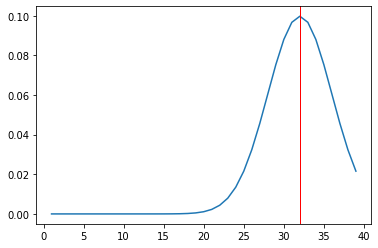

In [24]:
# generate normal distribution values
#improve the graph by using the xaxis [0...n], y=1/sqrt(2 pi \sigma^{2} )
# https://www.youtube.com/watch?v=Dn6b9fCIUpM&t=41s
import math

def normal_vals(mu, sigma,x):
    pow_e = -math.pow(x-mu,2)/(2*math.pow(sigma,2))
    return math.exp(pow_e)/math.sqrt(2*math.pi*math.pow(sigma,2))
    

from matplotlib import pyplot
%matplotlib inline

xaxis = list(range(1,40))
yaxis = list(map(lambda x: normal_vals(32,4,x), xaxis))


assert len(xaxis)== len(yaxis)

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.plot(xaxis,yaxis)
ax.axvline(x=32,linewidth=1, color='r')

# To obtain the maximum likelihood we ju


#### Finding the maximum likelihood $\sigma, \mu$

1. Fix the $\sigma$ value and change the $\mu$ value to find the maximum, which is where the slope given by the function
$$f\left(x_{i}|b\right) = \frac{1}{\sqrt{2\pi\sigma^{2}}} exp\bigg(\frac{-\left(x-\mu\right)^{2}}{2\sigma^{2}}\bigg)$$
Its value where the slope of the curve is `0` is the maximum likelihood $\mu$ of the function.
2. Fix the $\mu$ and calculate the value of $\sigma$ next.
3. The above was the likelihood determination given `1` x. For finding the maximum likelihood given two `independant` x valuese e.g.

$L\left(\mu=28, \sigma=2|x1=32 and x2=34\right)$
We calculate L, separately with the above exponential function, e.g
L at x1 = 32,34, and multiply their outcomes since their probabilities are independant.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# %matplotlib inline
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)
print('x',X.shape)
#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)
    
GaussianMixture?

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(5, 1.7))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()

x (1000, 1)


<Figure size 500x170 with 3 Axes>

#### Equation for Multivariate Gaussian Model
Gaussian Density function for multivariate data:
$$\mathscr{N}\left(\underrightarrow{x};\underrightarrow{\mu},\sum \right) = \frac{1}{\left(2\pi\right)^{d/2}}\bigg|\sum^{-1/2}exp\bigg\{ -\frac{1\left(\underrightarrow{x}-\underrightarrow{\mu}\right)\sum^{-1}\left(\underrightarrow{x}-\underrightarrow{\mu}\right)^{T}}{2}\bigg\}$$

This is the distribution that we are assuming,

here: 
$\mu$ - Length-d row vector

$\sum =$ dxd matrix

$|\mu|$ matrix determinant

where:

$\hat{\mu} = \frac{1}{m}\sum_{j}\underrightarrow{x}^{j}$

$\hat{\sum} = \frac{1}{m}\sum_{j}\left(\underrightarrow{x}^{j} - \underrightarrow{\hat{\mu}}\right)^{T}\left(\underrightarrow{x}^{j} - \underrightarrow{\hat{\mu}}\right)$

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture as GMM
features_df = df[df.columns.values[:-1]]
labels_df = df[df.columns.values[-1]]

def encode(series_arg:pd.Series):
    rep_dict = {}
    for i,dat in enumerate(series_arg.unique()):
        rep_dict[dat]=i
        series_arg = series_arg.replace(dat,i)
    return series_arg,rep_dict
  
    
train_feat,test_feat,train_lab,test_lab = train_test_split(features_df,labels_df,test_size=0.33)

test_lab,test_enc = encode(test_lab)
train_lab,train_enc = encode(train_lab)


In [53]:
gmm = GMM(n_components=3).fit(train_feat)

In [55]:
pred_lab = gmm.predict(test_feat)



## Dealing with the missing values 
1. Drop the entire column with the missing values.
2. Imputation - Fill the column. E.g. take the average of all the values in the column present and fill the missing values with those.
3. Extension of imputation - Add the missing values as another feature. I.E maybe a colum as binay of missing values.

eg:
>|X   |Y|
|----|-|
|  1 |1|
|  2 |1|
|  3 |2|
|NULL|2|

>__CHANGES TO__

>|X   |Y|Missing_X|
|----|-|---------|
|  1 |1|FALSE    |
|  2 |1|FALSE    |
|  3 |2|FALSE    |
|NULL|2|TRUE     |


### Dealing with Categorical Variables:
1. Dropping the categorical variables from the data. This approach will work well only when the columns dropped did not contain useful information.
2. Label Encoding: Assigning unique value to a different integer.

    e.g

>|Col1|Col1(after label encoding)|
|----|---------------------------|
|categ1|       1                 |
|categ2|       2                 |
|categ3|       3                 |
|categ1|       1                 |
|categ3|       3                 |

`Ordinal values` have a clear sence of sequencing in their order
3. One hot encoding: It is the preference for the low cardinality of the features in the dataset as it results in the expansion of the size of the dataset.
e.g.

|col   |         
|------|         
|red   |         
|red   |         
|yellow|         
|green |         
|yellow|         

| red|yellow|green|
|----|------|-----|
|1|0|0|
|1|0|0|
|0|1|0|
|0|0|1|
|0|1|0|

#### Cross Validation
<img src="./cross_valid.png" alt="Drawing" style="width: 700px;"/>
Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

1. For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
2. For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.


### Gradient Boosting (Ensemble Method)
Ensemble methods combine the predictions of several models (e.g., several trees, in the case of random forests).


Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble.
It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
4. Finally, we add the new model to ensemble, and ...
5. ... repeat!


## Data Leakage
Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. 

The data leakage can be due to two prominent reasons:

**1. Target leakage** :Target leakage occurs when your predictors include data that will not be available at the time you make predictions. 

**2. train-test contamination** :A different type of leak occurs when you aren't careful to distinguish training data from validation data.

To avoid these types of problems never apply imputer or other type type of data processing before applying any algorithm.
